# Drawing with hockey_rink

In this notebook, we'll look at examples of how to draw rinks using the hockey_rink package.

In [3]:
from hockey_rink import *
import matplotlib.pyplot as plt

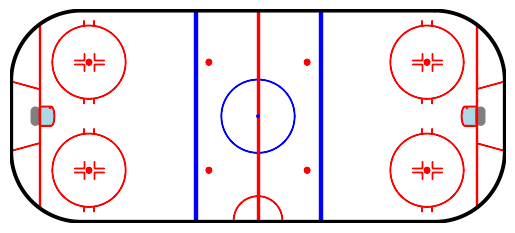

In [4]:
rink = NHLRink()
rink.draw()
plt.show()

## Provided rinks

There are 6 types of rinks provided by the package. We can draw these to different Axes objects by assigning the Axes to `ax`. The `draw` function also returns the Axes object the rink was drawn to.

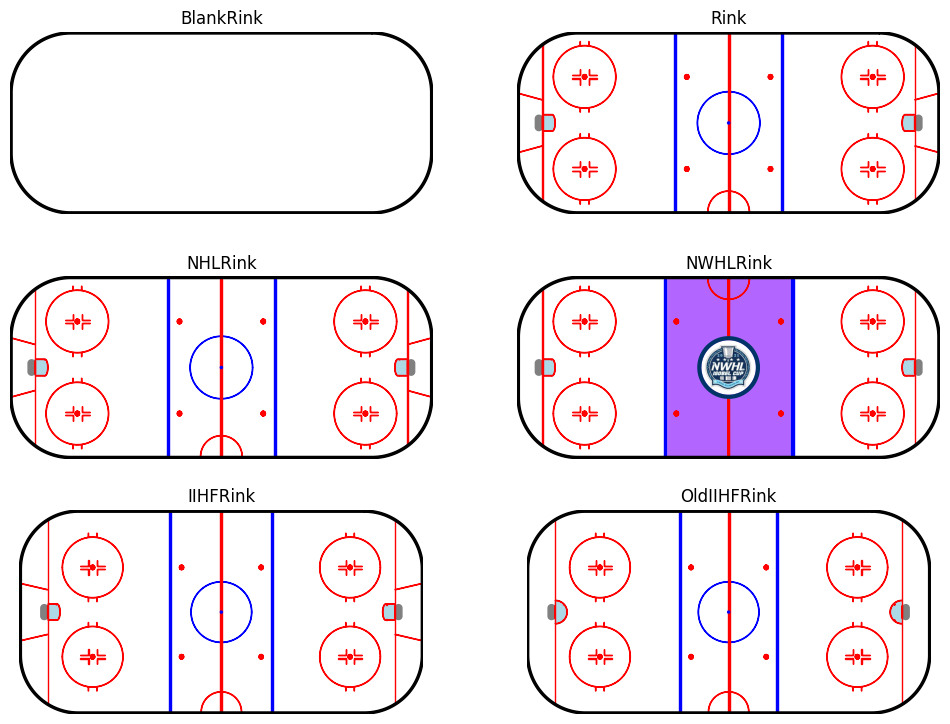

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(12, 9))
included_rinks = (BlankRink, Rink, NHLRink, NWHLRink, IIHFRink, OldIIHFRink)

for RinkType, ax in zip(included_rinks, axs.ravel()):
    rink = RinkType()
    rink.draw(ax=ax)
    ax.set_title(RinkType.__name__)

plt.show()

Handling most of the figure parameters will have to be done with plt, but we can set the size of a Figure using the `figsize` parameter.

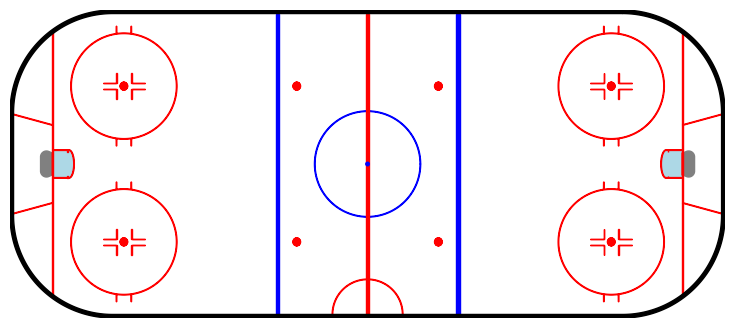

In [6]:
rink = NHLRink()
rink.draw(figsize=(10, 4))
plt.show()

## Rink dimensions

If none of the default rinks provide the dimensions we want, we can update them using the `boards` parameter.

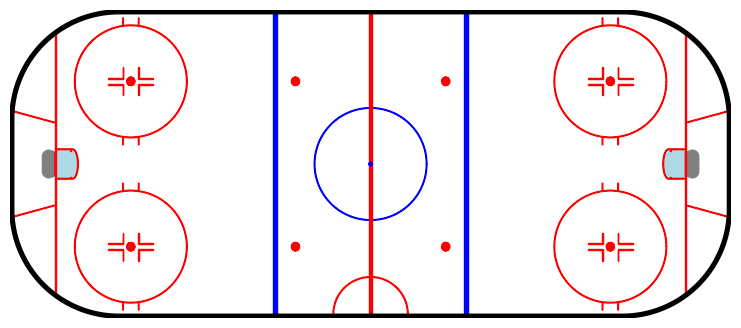

In [7]:
smaller_rink = NHLRink(boards={"length": 190, "width": 80})
smaller_rink.draw(figsize=(10, 4))
plt.show()

In case anyone isn't convinced that rink is, in fact, using the smaller dimensions (though, the distance between the boards and hashmarks should make it clear), we can use `despine=False` to see the x and y axes.

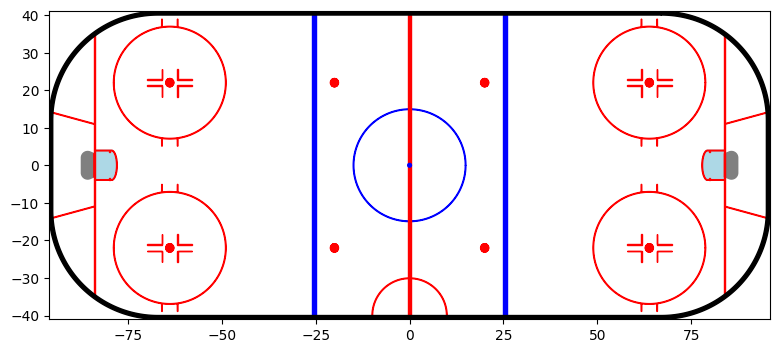

In [8]:
smaller_rink.draw(figsize=(10, 4), despine=False)
plt.show()

We can even make the dimensions nonsensical and the package will try to do the right thing. For example, we can see what it would look like if someone wanted to play hockey inside a puck-shaped rink.

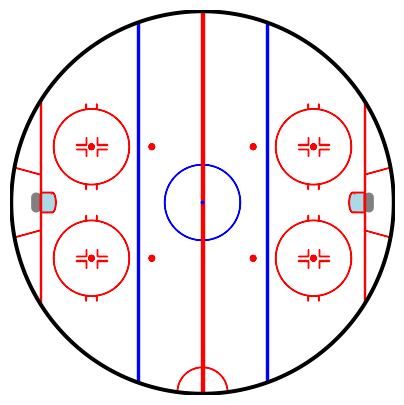

In [9]:
round_rink = NHLRink(boards={"length": 150, "width": 150, "radius": 75})
round_rink.draw(figsize=(5, 5))
plt.show()

Or, for the floor hockey enthusiasts, we can get rid of the arc in the boards to make a rectangular rink.

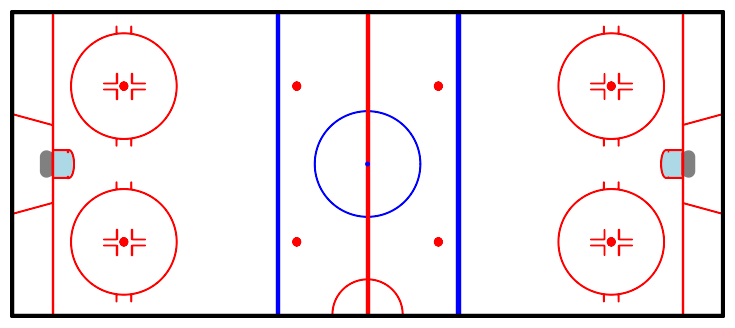

In [10]:
rectangular_rink = NHLRink(boards={"radius": 0})
rectangular_rink.draw(figsize=(10, 4))
plt.show()

## Adding features

We can add features by providing the feature's name and a dict of its attributes when creating the rink.  

The package provides several types of features in the [rink_feature.py](https://github.com/the-bucketless/hockey_rink/blob/master/hockey_rink/rink_feature.py) file. If none of these work for what we want, additional types of features can be created by making a class that inherits from `RinkFeature` and giving it a `get_centered_xy` method. But, for these examples, we'll stick with the features already provided by the package.  

A common feature we may want to add is the home team's logo at center ice. There are two RinkFeature objects for images: `RinkImage` and `CircularImage`. The only difference between the two is that `CircularImage` will clip the image to be inside a circle. This was created specifically with center ice logos in mind, so that's what we'll use.

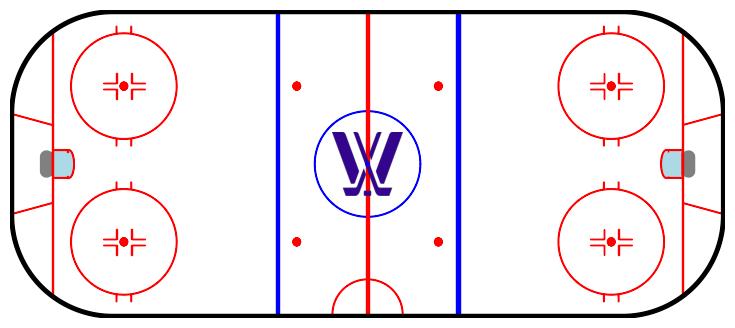

In [11]:
# PWHL league logo.
image_url = (
    "https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/"
    "Logo_of_the_Professional_Women%E2%80%99s_Hockey_League.svg/"
    "270px-Logo_of_the_Professional_Women%E2%80%99s_Hockey_League.svg.png"
)

logo_rink = NHLRink(
    center_logo={
        "feature_class": CircularImage,
        "image_path": image_url,

        # The dimensions the image will be resized to.
        "length": 20, "width": 18,

        "x": 0, "y": 0,    # Center ice.
        "radius": 14,    # The radius of the circle for clipping.
        "zorder": 11,
    },
)
logo_rink.draw(figsize=(10, 4))

plt.show()

There's also a trick to remove the red line from the center circle if it's interfering with the image. We can keep it outside the circle by changing the `feature_class` of the `red_line` to `LowerInwardArcRectangle` (because naming things is hard) and updating a couple attributes.

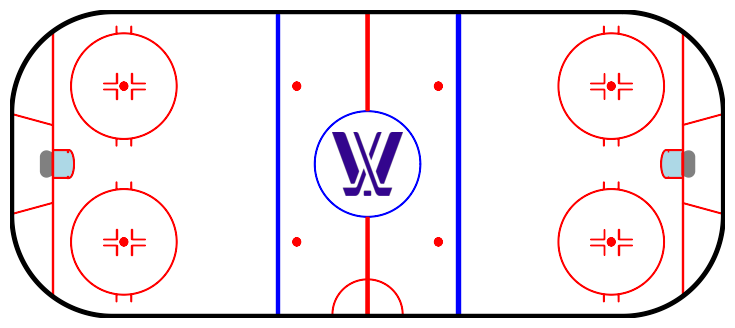

In [12]:
logo_rink = NHLRink(
    center_logo={
        "feature_class": CircularImage,
        "image_path": image_url,
        "length": 20, "width": 18,
        "x": 0, "y": 0,
        "radius": 14,
        "zorder": 11,
    },
    red_line={
        "feature_class": LowerInwardArcRectangle,

        # The radius of the center circle.
        "radius": 15 + 1/12,

        # LowerInwardArcRectangle is only shown on one side of the rink.
        # Flip it across to both sides with is_reflected_y.
        "is_reflected_y": [False, True],
    },
    center_dot={"visible": False},
)
logo_rink.draw(figsize=(10, 4))

plt.show()

While center logos may be the most common addition, we can add any number of other features. A lot of more general purpose rinks include the ringette line at the top of the circles. This can easily be added using a `RinkRectangle`.  

Note that the ice in each zone is drawn (it isn't just a part of the background). To ensure that features show on top, we need to set `zorder` to something higher than 1.

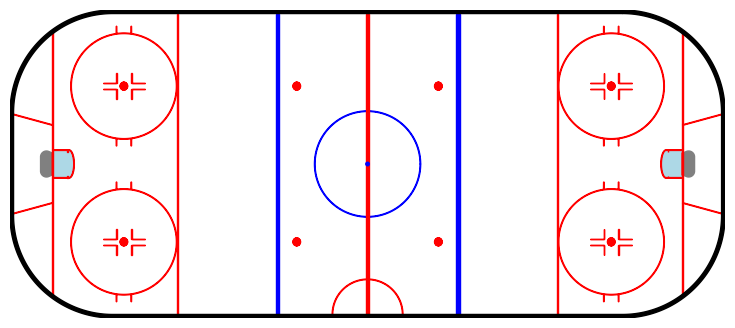

In [13]:
ringette_rink = NHLRink(
    ringette_line={
        "feature_class": RinkRectangle,

        # x,y is the center of the rectangle.
        # This puts it at the top of the faceoff circles.
        "x": 69 - 15 - 1/6 * 2, "y": 0,

        # The length is the size of the line in the x direction.
        "length": 1/6,

        # The width is the size of the line in the y direction.
        "width": 85,

        # Only need to create one feature and let the package reflect it across
        # the ice.
        "is_reflected_x": [False, True],

        "color": "red",
        "zorder": 5,    # Draw on top of the ice.
    },
)
ringette_rink.draw(figsize=(10, 4))
plt.show()

## Removing features

Going the other way, features can be removed from the rink by setting `visible=False`. For example, sometimes it's better not to have a visible net on the drawing.

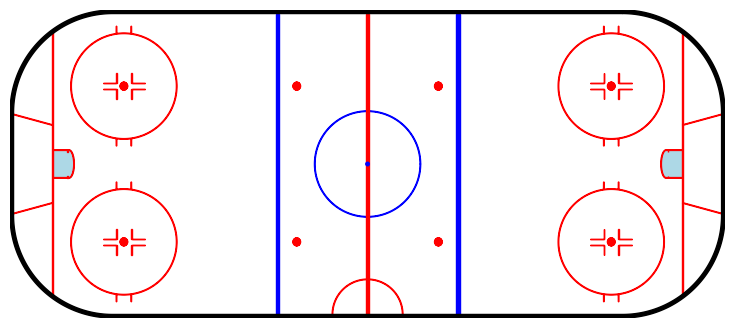

In [14]:
no_net_rink = NHLRink(net={"visible": False})
no_net_rink.draw(figsize=(10, 4))
plt.show()

## Display ranges

All the rinks we've looked at so far have displayed the entire surface. Sometimes, we don't need the whole rink. The easiest way to see a subset of the rink is by setting `display_range` to one of its accepted options:
- `full`: the full ice surface (the default option)
- `half` or `offense`: the offensive (right) side of the rink, including the neutral zone
- `defense`: the defensive (left) side of the rink, including the neutral zone
- `ozone`: the offensive (right) side of the rink starting at the blue line
- `defense`: the defensive (left) side of the rink starting at the blue line

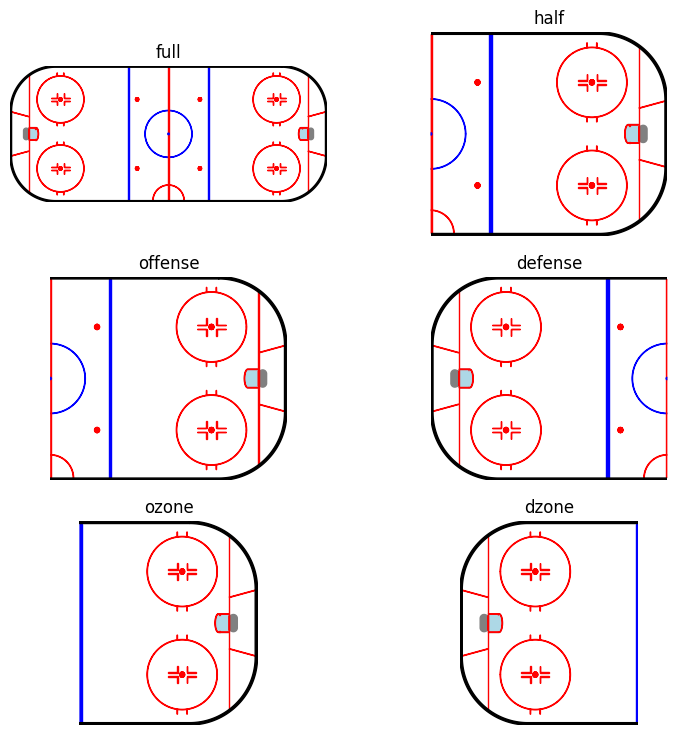

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(9, 9))

display_ranges = ["full", "half", "offense", "defense", "ozone", "dzone"]

for display_range, ax in zip(display_ranges, axs.ravel()):
    rink.draw(display_range=display_range, ax=ax)
    ax.set_title(display_range)

plt.show()

If none of those provide what we want, we can also subset the rink by setting `xlim` and `ylim` to whatever part of the rink we want to see.  

Note that, by default, the rink coordinates are set so that (0, 0) is center ice. This can be changed using the `x_shift` and `y_shift` parameters if we're using a different coordinate system (for example, (0, 0) being the bottom left).

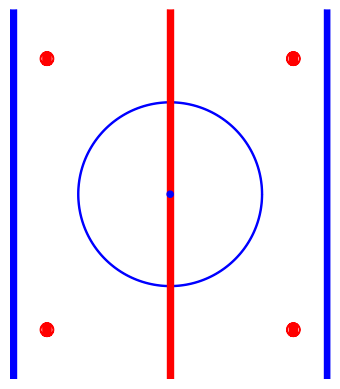

In [16]:
rink.draw(xlim=[-26, 26], ylim=[-30, 30])
plt.show()

## Rotations

We can also rotate the rink to display it from different angles. The differences are easiest to display by focusing on one side of the rink. In this case we'll use the ozone.

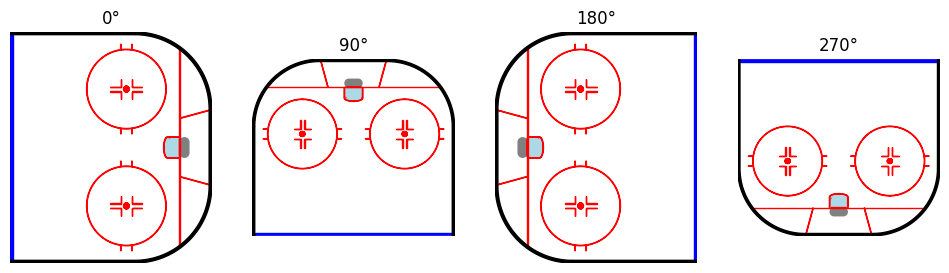

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

for i, ax in enumerate(axs.ravel()):
    rink.draw(display_range="ozone", rotation=90 * i, ax=ax)
    ax.set_title(f"{90 * i}°")

plt.show()

While 90° rotations will likely make the most sense, we can rotate it as we see fit. Additionally, we can provide the rotation when creating the rink to make it the default option for drawing.  

Note that we can draw the same rink on multiple Axes; we don't need to create a Rink each time we want to draw one.

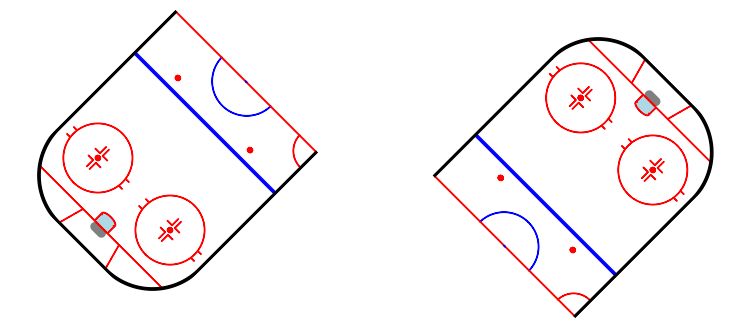

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

rotated_rink = NHLRink(rotation=45)    # Making the rotation the default.

rotated_rink.draw(ax=axs[0], display_range="defense")
rotated_rink.draw(ax=axs[1], display_range="offense")

plt.show()

## Using linewidth for finer detail

By default, all features of the rink have Matplotlib's default linewidth. This ensures that, even with very small figures, all the features should appear.

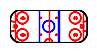

In [19]:
rink.draw(figsize=(1, 0.5))
plt.show()

When using larger figures, we won't need to force everything to show up. To get a little finer detail, we can set `linewidth` to 0. This will affect all features that don't have their own `linewidth` attribute set to override it.

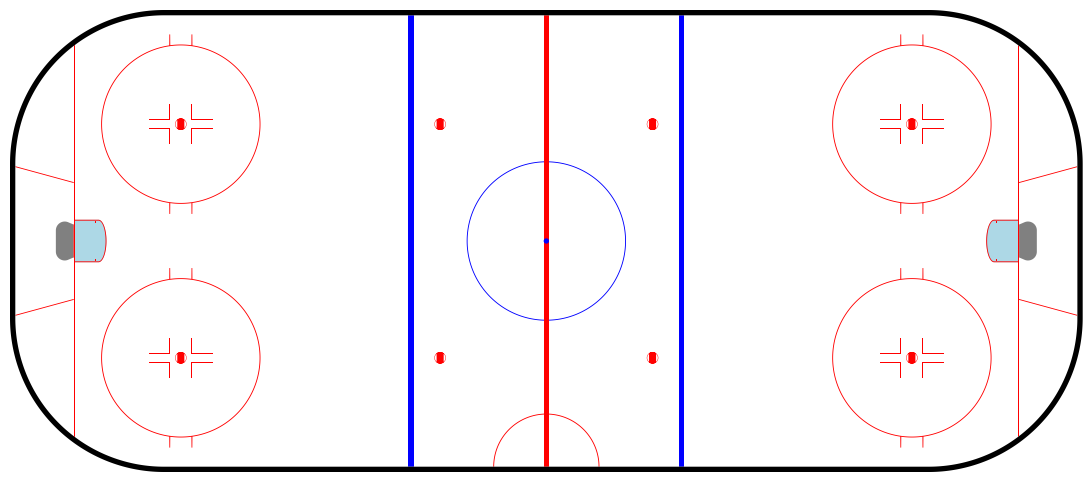

In [20]:
thin_line_rink = NHLRink(linewidth=0)
thin_line_rink.draw(figsize=(14, 6))
plt.show()

The most notable differences will be the smaller lines and the faceoff dots. We can see these differences a little better by drawing the two rinks next to each other.

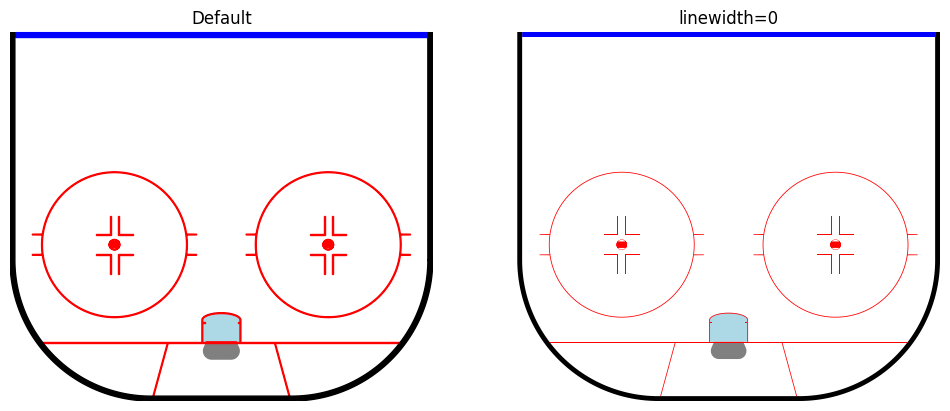

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

rink.draw(display_range="ozone", rotation=270, ax=axs[0])
axs[0].set_title("Default")

thin_line_rink.draw(display_range="ozone", rotation=270, ax=axs[1])
axs[1].set_title("linewidth=0")

plt.show()

## Alpha for transparency

Another parameter that can be applied to all features is `alpha`. This will change the transparency of all features on the rink.

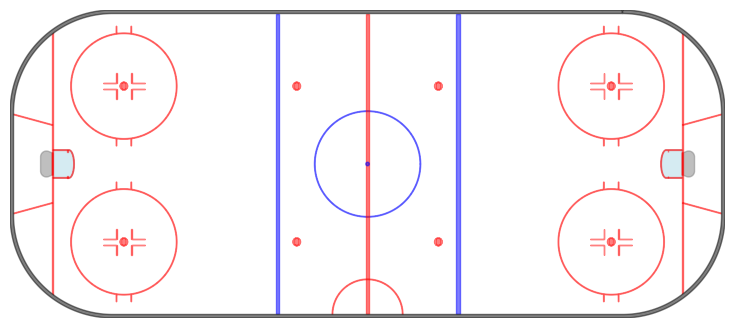

In [22]:
alpha_rink = NHLRink(alpha=0.5)
alpha_rink.draw(figsize=(10, 4))
plt.show()

To avoid applying `alpha` to a specific feature (in this case the boards) we can override it by setting the feature's `alpha` attribute.

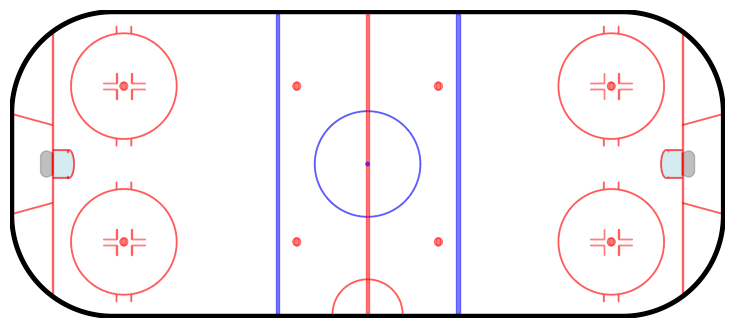

In [23]:
alpha_rink = NHLRink(alpha=0.5, boards={"alpha": 1})
alpha_rink.draw(figsize=(10, 4))
plt.show()

## Drawing ice

There is one feature provided that isn't visible by default: a drawing of ice on top of the rink. If we make it visible, it'll draw an ice image from [NHL.com](https://www.nhl.com/).

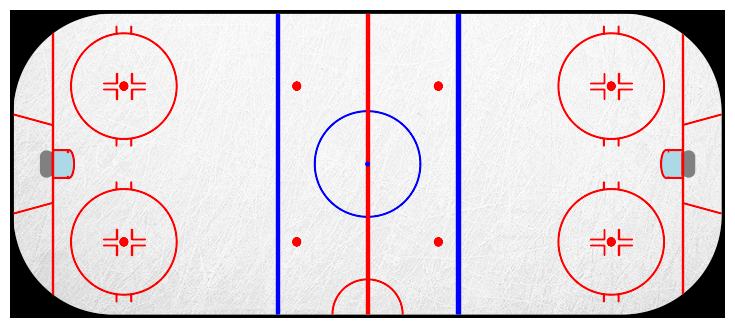

In [24]:
ice_rink = NHLRink(ice={"visible": True}, boards={"visible": False})
ax = ice_rink.draw(figsize=(10, 4))
ax.set_facecolor("black")
plt.show()

## Dark theme

Finally, let's combine some of what we've seen to make a rink for a dark theme.

In [25]:
# The color to use for the ice.
dark_theme_color = "#43464B"

# Features that won't be displayed.
features_to_remove = (
    "trapezoid",
    "crease",
    "net",
    "center_dot",
    "ref_circle",
)

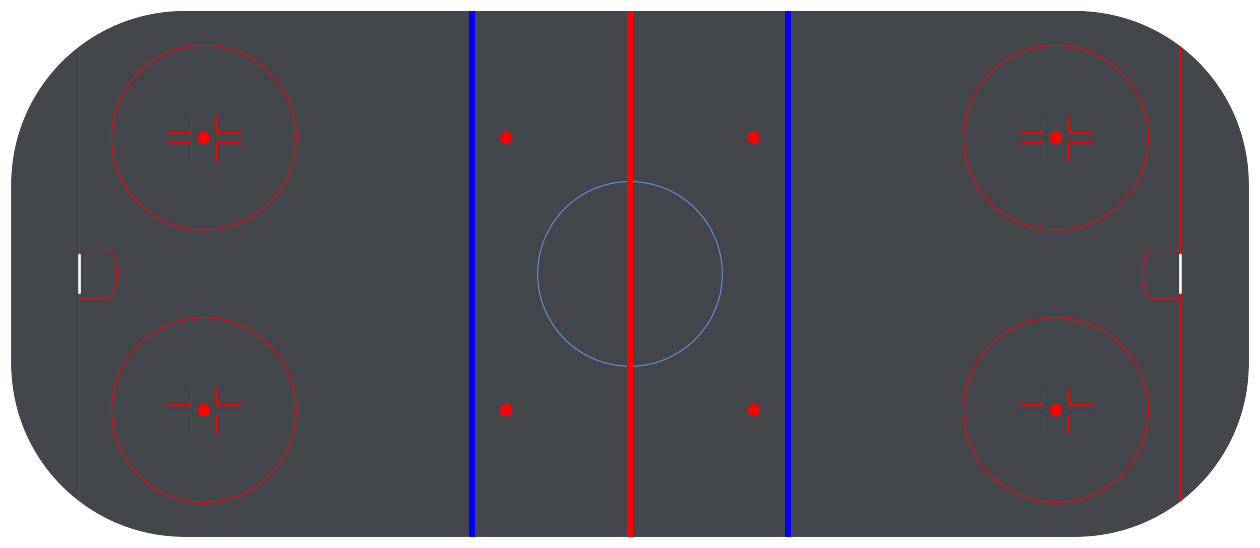

In [26]:
fig, ax = plt.subplots(figsize=(16, 7), facecolor="none")

# The only difference between NHLRink and Rink is that NHLRink includes little
# notches in the crease.
dark_rink = Rink(
    # Change the color of all three zones.
    **{
        feature: {"color": dark_theme_color}
        for feature in ("ozone", "nzone", "dzone")
    },

    # Remove features to simplify the image.
    **{
        feature: {"visible": False}
        for feature in features_to_remove
    },

    # When the net is removed, the crossbar gets removed with it. Need to add
    # it back. Setting linewidth will make it thicker to help it pop.
    crossbar={"visible": True, "color": "white", "linewidth": 1},

    # Similarly, the crease outline gets removed when the net is removed.
    crease_outline={"visible": True},

    # To get rid of the hashmarks, change the class of the faceoff circles.
    faceoff_circle={"feature_class": RinkCircle},

    # Convert the dots to circles as well.
    faceoff_dot={"feature_class": RinkCircle, "thickness": 0},

    # Make the board a thin white.
    boards={"color": "white", "thickness": 1/6},

    # Make the center circle a different shade of blue.
    center_circle={"color": "cornflowerblue"},

    linewidth=0,
)

dark_rink.draw(ax=ax)
ax.set_facecolor("none")

plt.show()